Dataset Shape: (8807, 12)

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing Values After Cleaning:
 show_id            0
type               0
title              0
director        2541
cast             817
country            0
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64


<ipython-input-5-2fe40b2cfb24>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['country'].fillna('Unknown', inplace=True)


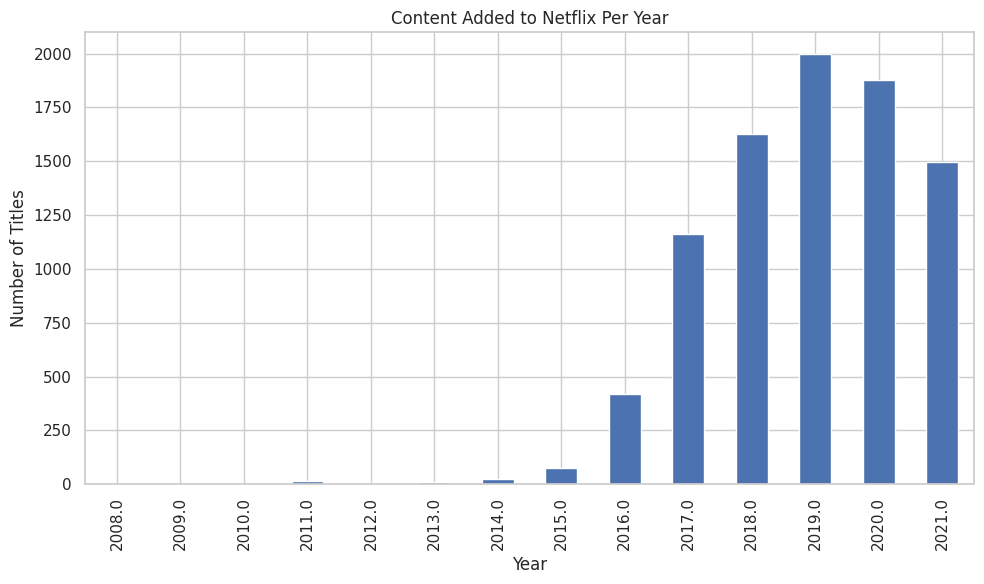

<ipython-input-5-2fe40b2cfb24>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix_df, palette='Set2')


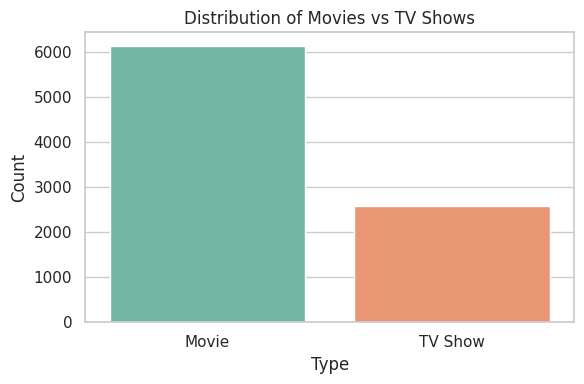

<ipython-input-5-2fe40b2cfb24>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


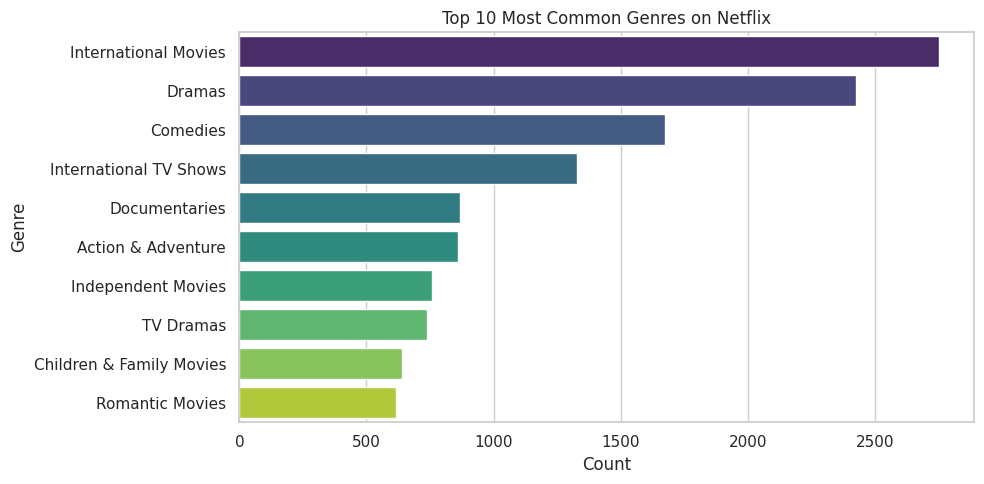


Project Summary:
- Most content on Netflix was added in recent years.
- There are more Movies than TV Shows.
- Popular genres include Documentaries, Dramas, and Comedies.


In [5]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 📌 2. Load Dataset
# Download from: https://www.kaggle.com/datasets/shivamb/netflix-shows
# Place the CSV file in the same directory or update the path
netflix_df = pd.read_csv("netflix_titles.csv")

# 📌 3. Data Overview
print("Dataset Shape:", netflix_df.shape)
print("\nData Types:\n", netflix_df.dtypes)
print("\nMissing Values:\n", netflix_df.isnull().sum())

# 📌 4. Clean Data
# Convert 'date_added' to datetime, and handle invalid date formats by coercing errors to NaT
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract year and month from 'date_added'
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Fill missing country values with 'Unknown'
netflix_df['country'].fillna('Unknown', inplace=True)

# Drop rows where 'date_added' is missing (i.e., NaT)
netflix_df.dropna(subset=['date_added'], inplace=True)

# Check for missing data after cleaning
print("\nMissing Values After Cleaning:\n", netflix_df.isnull().sum())

# 📌 5. Exploratory Data Analysis

# Content added per year
plt.figure(figsize=(10,6))
netflix_df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added to Netflix Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# Type distribution (Movie vs TV Show)
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=netflix_df, palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top 10 genres (from 'listed_in')
from collections import Counter
all_genres = ','.join(netflix_df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# 📌 6. Conclusion
print("\nProject Summary:")
print("- Most content on Netflix was added in recent years.")
print("- There are more Movies than TV Shows.")
print("- Popular genres include Documentaries, Dramas, and Comedies.")
